# Normal Distributions

### Integrating Normal PDFs

The following is the probability density function (PDF) of a normal (Gaussian) distribution for a continuous random variable $X$ ~ $N(\mu, {\sigma}^{2})$:

\begin{equation*}
f_X(x) = \frac{1}{\sqrt{2 \pi} \sigma} {e}^{-\frac{{x - \mu}^{2}}{2 {\sigma^2}}}
\label{eq:1} \tag{1}
\end{equation*}

And the probability of $X$ is given by the integral of that PDF:

\begin{equation*}
\begin{split}
P(X = x) &= \int_{-\infty}^{\infty} f(x) dx \\
&= \frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} {e}^{-\frac{{x - \mu}^{2}}{2 {\sigma}^{2}}} dx
\end{split}
\label{eq:2} \tag{2}
\end{equation*}

This probability is difficult to solve without using polar coordinates, so the next few steps will set us up for that. First, let's define $u = \frac{x - \mu}{\sigma}$ and $du = \frac{dx}{\sigma}$. The probability can then be rewritten as:

\begin{equation*}
P(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} {e}^{-\frac{1}{2} {u}^{2}} du
\label{eq:3} \tag{3}
\end{equation*}

To get the 2D cartesian plane variables needed for the polar coordinates conversion, we can square $P(x)$ and substitute one factor of $P(x)$ with $P(v)$ (where $u = v$): 

\begin{equation*}
\begin{split}
{P(x)}^{2} &= P(x)P(v) \\
&= \biggl(\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} {e}^{-\frac{1}{2} {u}^{2}} du\biggr) \biggl(\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} {e}^{-\frac{1}{2} {v}^{2}} dv \biggr) \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} {e}^{-\frac{{u}^{2} + {v}^{2}}{2}} dudv
\end{split}
\label{eq:4} \tag{4}
\end{equation*}

Now, we're ready to use polar coordinates. Our integral is from $-\infty$ to $\infty$ for both $u$ and $v$, which covers the entire cartesian plane. In terms of $r$ and $\theta$, that's $0 \leq \theta \leq 2\pi$ and $0 \leq r \leq \infty$. That gives us:

\begin{equation*}
\begin{split} 
u = r \cos \theta \\
v = r \sin \theta
\end{split}
\label{eq:5} \tag{5}
\end{equation*}

Plugging those back into ${P(x)}^2$, we have:

\begin{equation*}
\begin{split} 
{P(x)}^{2} &= \frac{1}{2 \pi} \int_{0}^{2\pi} \int_{0}^{\infty} {e}^{-\frac{r^2{\cos}^{2}\theta + r^2{\sin}^{2}\theta}{2}} \lvert J\lvert dr d\theta \\
&= \frac{1}{2 \pi} \int_{0}^{2\pi} \int_{0}^{\infty} {e}^{-\frac{r^2}{2}} \lvert J\lvert dr d\theta
\end{split}
\label{eq:6} \tag{6}
\end{equation*}

Solving for the determinant of the Jacobian, we have:

\begin{equation*}
\begin{split}
\lvert J \lvert &= \begin{vmatrix}
\frac{\delta u}{\delta\theta} & \frac{\delta u}{\delta r} \\
\frac{\delta v}{\delta\theta} & \frac{\delta v}{\delta r} 
\end{vmatrix} = \begin{vmatrix}
-r \sin \theta & \cos \theta \\
r \cos \theta & \sin \theta
\end{vmatrix} \\
&= \lvert (-r \sin \theta)(\sin \theta) - (r \cos \theta)(\cos \theta)\lvert \\
& = \lvert -r({\cos}^{2}\theta + {\sin}^{2}\theta) \lvert = \lvert -r \lvert = r
\end{split}
\label{eq:7} \tag{7}
\end{equation*}

Using substitution again, let's set $w = \frac{{r}^{2}}{2}$ and $dw = rdr$:  

\begin{equation*}
\begin{split}
{P(x)}^{2} &= \frac{1}{2 \pi} \int_{0}^{2\pi} \biggl[\int_{0}^{\infty} {e}^{-w} dw\biggr] d\theta = \frac{1}{2 \pi} \int_{0}^{2\pi} {\biggl[-{e}^{-w} \biggr]}^{\infty}_{0} d\theta \\
& = \frac{1}{2 \pi} \int_{0}^{2\pi} d\theta = \frac{1}{2 \pi} {\biggl[\theta\biggr]}^{2\pi}_{0} = 1
\end{split}
\label{eq:8} \tag{8}
\end{equation*}

Therefore, $P(X = x) = 1$.

#### Example

Using [this HackerRank problem](https://www.hackerrank.com/challenges/normal-distribution-1/problem) as an example, we have $X$ ~ $N(30, 4^2)$ and want to find $P(x < 40)$, $P(x > 21)$, and $P(30 < x < 35)$. Note that $\mu \pm 4\sigma$ (`x_min` and `x_max`) is used in place of $\pm \infty$.

In [4]:
from scipy.integrate import quad
import scipy.stats

mean = 30 
std = 4
x_min = mean - 4*std
x_max = mean + 4*std

def normal_distribution(x):
    return scipy.stats.norm.pdf(x, mean, std)

def solve(x1, x2):
    return round(quad(normal_distribution, x1, x2)[0], 3)
 
print("P(x < 40) = ", solve(x_min, 40))
print("P(x > 21) = ", solve(21, x_max))
print("P(30 < x < 35) = ", solve(30, 35))

P(x < 40) =  0.994
P(x > 21) =  0.988
P(30 < x < 35) =  0.394


This is the HackerRank-friendly version using only `math`:

In [5]:
import math
from math import erf, sqrt

def normal_distribution2(x):
    return 0.5 * (1 + erf((x - mean) / (std * sqrt(2))))

def solve2(x1, x2):
    return round(normal_distribution2(x2) - normal_distribution2(x1), 3)

print("P(x < 40) = ", solve2(x_min, 40))
print("P(x > 21) = ", solve2(21, x_max))
print("P(30 < x < 35) = ", solve2(30, 35))

P(x < 40) =  0.994
P(x > 21) =  0.988
P(30 < x < 35) =  0.394


And the following is a visual representation of those probabilities:

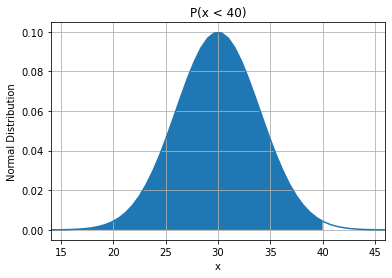

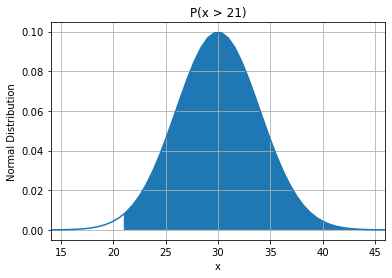

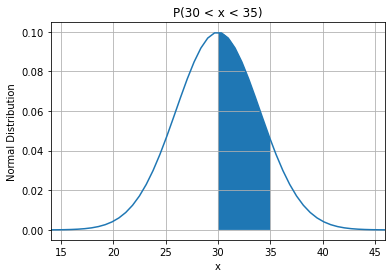

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(x_min, x_max)
y = normal_distribution(x)

def plot_normal_distribution(x1, x2, plot_title):
    plt.plot(x, y)
    plt.grid()
    plt.xlim(x_min,x_max)
    plt.title(plot_title)
    plt.xlabel('x')
    plt.ylabel('Normal Distribution')
    # Plot probability
    px = np.linspace(x1, x2)
    py = normal_distribution(px)
    plt.fill_between(px, py)
    plt.show()
    
plot_normal_distribution(x_min, 40, "P(x < 40)")
plot_normal_distribution(21, x_max, "P(x > 21)")
plot_normal_distribution(30, 35, "P(30 < x < 35)")

### Sum of IID Normal Random Variables

The sum of two independent and identically distributed (IID) normal random variables $X$ ~ $N(\mu_x, \sigma_x^2)$ and $Y$ ~ $N(\mu_y, \sigma_y^2)$ is also normal, i.e.  $(X + Y)$ ~ $N(\mu_x + \mu_y, \sigma_x^2 + \sigma_y^2)$. Similarly, this applies to the sum of any number of independent normal random variables. 

#### Proof using convolutions

The PDFs of independent random variables $X$ and $Y$ are:

\begin{equation*}
\begin{split}
f_X(x) &= \frac{1}{\sqrt{2 \pi} \sigma_x} {e}^{-\frac{(x - \mu_x)^{2}}{2 {\sigma_x^2}}} \\
f_Y(y) &= \frac{1}{\sqrt{2 \pi} \sigma_y} {e}^{-\frac{(y - \mu_y)^{2}}{2 {\sigma_y^2}}}
\end{split}
\label{eq:9} \tag{9}
\end{equation*}

And the distribution of their sum $Z$ is the convolution of $f_X(x)$ and $f_Y(y)$:

\begin{equation*}
\begin{split}
f_Z(z) &= \int_{-\infty}^{\infty} f_X(x) f_Y(z-x) dx \\
&= \int_{-\infty}^{\infty} \frac{1}{2 \pi \sigma_x \sigma_y} {e}^{-\frac{\sigma_x^2(z - x - \mu_y)^2 + \sigma_y^2(x - \mu_x)^2}{2\sigma_x^2 \sigma_y^2}} dx \\
&= \int_{-\infty}^{\infty} \frac{1}{2 \pi \sigma_x \sigma_y} {e}^{-\frac{x^2(\sigma_x^2 + \sigma_y^2) - 2x(\sigma_x^2 (z - \mu_y) + \sigma_y^2 \mu_x) + \sigma_x^2 (z^2 +\mu_y^2 -2z \mu_y) + \sigma_y^2 \mu_x^2}{2\sigma_x^2 \sigma_y^2}} dx
\end{split}
\label{eq:10} \tag{10}
\end{equation*}

Defining $\sigma_z^2 = \sigma_x^2 + \sigma_y^2$ and completing the square gives us:

\begin{equation*}
\begin{split}
f_Z(z) &= \int_{-\infty}^{\infty} \frac{1}{\frac{2 \pi \sigma_z \sigma_x \sigma_y}{\sigma_z}} {e}^{-\frac{x^2 - \frac{2x(\sigma_x^2 (z - \mu_y) + \sigma_y^2 \mu_x) + \sigma_x^2 (z^2 +\mu_y^2 -2z \mu_y) + \sigma_y^2 \mu_x^2}{\sigma_z^2}}{2\biggl(\frac{\sigma_x \sigma_y}{\sigma_z}\biggr)^2}} dx \\
&= \int_{-\infty}^{\infty} \frac{1}{\frac{2 \pi \sigma_z \sigma_x \sigma_y}{\sigma_z}} {e}^{-\frac{\biggl(x - \frac{\sigma_x^2 (z - \mu_y) + \sigma_y^2\mu_x}{\sigma_z^2} \biggr)^2 - \biggl(\frac{\sigma_x^2 (z - \mu_y) + \sigma_y^2\mu_x}{\sigma_z^2} \biggr)^2 + \frac{\sigma_x^2 (z - \mu_y) + \sigma_y^2\mu_x}{\sigma_z^2}}{2\biggl(\frac{\sigma_x \sigma_y}{\sigma_z}\biggr)^2}} dx \\
&= \frac{1}{\sqrt{2} \pi \sigma_z} {e}^{-\frac{(z - (\mu_x + \mu_y))^2}{2\sigma_z^2}} \int_{-\infty}^{\infty} \frac{1}{\frac{\sqrt{2} \pi \sigma_x \sigma_y}{\sigma_z}} {e}^{-\frac{\biggl(x - \frac{\sigma_x^2 (z - \mu_y) + \sigma_y^2\mu_x}{\sigma_z^2} \biggr)^2}{2\biggl(\frac{\sigma_x \sigma_y}{\sigma_z}\biggr)^2}} dx
\end{split}
\label{eq:11} \tag{11}
\end{equation*}

The integral is a normal density distribution on $x$ with a standard deviation of $\frac{\sigma_x \sigma_y}{\sigma_z}$, which we know is equal to 1. Therefore, the PDF of $X + Y$ is the following normal distribution with a mean of $\mu_x + \mu_y$ and standard deviation $\sigma_z^2$: 

\begin{equation*}
f_Z(z) = \frac{1}{\sqrt{2} \pi \sigma_z} {e}^{-\frac{(z - (\mu_x + \mu_y))^2}{2\sigma_z^2}}
\label{eq:12} \tag{12}
\end{equation*}

#### Proof using MGF

Moment generating functions (MGFs) can be used to uniquely determine the distribution sum of random variables. The MGFs of normally distributed random variables $X$ and $Y$ are:

\begin{equation*}
\begin{split}
\phi_X(t) &= e^{\mu_x t + \frac{1}{2}\sigma_x^2 t^2} \\
\phi_Y(t) &= e^{\mu_y t + \frac{1}{2}\sigma_y^2 t^2}
\end{split}
\label{eq:13} \tag{13}
\end{equation*}

The MGF of $X+Y$ is simply the product of the two independent random variables $X$ and $Y$:

\begin{equation*}
\begin{split}
\phi_{X+Y}(t) &= \phi_X(t) \cdot \phi_Y(t) \\
&= e^{\mu_x t + \frac{1}{2}\sigma_x^2 t^2} \cdot e^{\mu_y t + \frac{1}{2}\sigma_y^2 t^2} \\
&= e^{(\mu_x + \mu_y)t + \frac{1}{2}(\sigma_x^2 + \sigma_y^2)t^2}
\end{split}
\label{eq:14} \tag{14}
\end{equation*}

Which proves that $X + Y$ ~ $N(\mu_x + \mu_y, \sigma_x^2 + \sigma_y^2)$.

### Product of IID Normal Random Variables

The product of two IID normal random variables $X$ and $Y$ (as defined above) is **not** normal. It's actually a linear combination of two Chi-squared random variables: 

\begin{equation*}
XY = \frac{1}{4}(X + Y)^2 - \frac{1}{4}(X - Y)^2 
\label{eq:15} \tag{15}
\end{equation*}

Knowing that $(X+Y)$ ~ $N(0, 2)$ and $(X-Y)$ ~ $N(0, 2)$, we have $\frac{(X + Y)^2}{2}$ ~ $\chi_1^2$ and $\frac{(X - Y)^2}{2}$ ~ $\chi_1^2$, respectively. The sum of two Chi-squared random variables is itself a Chi-squared random variable. This applies to the product of any number of independent normal random variables. However, the product of the PDFs for $X$ and $Y$ **is** a bivariate normal distribution with zero correlation.   